In [1]:
import numpy as np
import pandas as pd
import codecs
import string

In [2]:
with codecs.open('spam.csv', 'r', encoding='ISO-8859-1') as f:
    df = pd.read_csv(f)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
396,ham,Was actually sleeping and still might when u c...,NaN,NaN,NaN
814,spam,U were outbid by simonwatson5120 on the Shinco...,NaN,NaN,NaN
2085,ham,Moji i love you more than words. Have a rich day,NaN,NaN,NaN
1664,ham,ÌÏ v ma fan...,NaN,NaN,NaN
1782,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1679,ham,"Today is \song dedicated day..\"" Which song wi..."
3671,ham,"came to look at the flat, seems ok, in his 50..."
3639,ham,He's really into skateboarding now despite the...
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...
830,spam,U have a secret admirer. REVEAL who thinks U R...


In [8]:
df.rename(columns={'v1':'Type','v2':'Text'},inplace=True)

In [9]:
df.sample(5)

,Type,Text
3538,ham,What happen dear. Why you silent. I am tensed
1091,ham,Please da call me any mistake from my side sor...
1966,ham,What's a feathery bowa? Is that something guys...
4954,ham,Doing my masters. When will you buy a bb cos i...
2235,ham,\Si.como no?!listened2the plaid album-quite gd...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.9 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.6 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 5.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.6 MB 6.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.6 MB 6.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 8.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 7.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.2/10.6 MB 9.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 8.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 9.1 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.6 MB 9.6 MB/s eta 0:00:01
   --

  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df['Type']=encoder.fit_transform(df['Type'])

In [13]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# 0--> ham   ,, 1--> spam

In [15]:
df.isnull().sum() #for missing values.

Type    0
Text    0
dtype: int64

In [16]:
df.duplicated().sum() #for duplicate values checking.

403

In [17]:
df=df.drop_duplicates(keep='first') #remove duplicate

In [18]:
df.shape

(5169, 2)

#EDA
(Expolatary Data analytics)

In [19]:
df.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['Type'].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

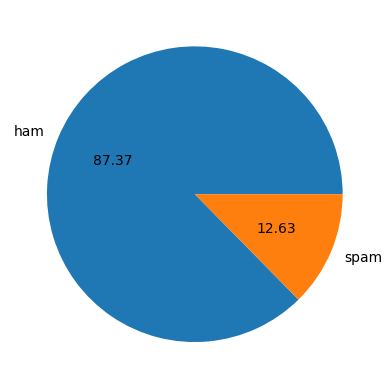

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['Text'].apply(len)

In [25]:
df.head()

,Type,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Type,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Type,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[df['Type']==0][['num_characters','num_words','num_sentences']].describe() #for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Type']==1][['num_characters','num_words','num_sentences']].describe() #for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

In [33]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='num_characters', ylabel='Count'>

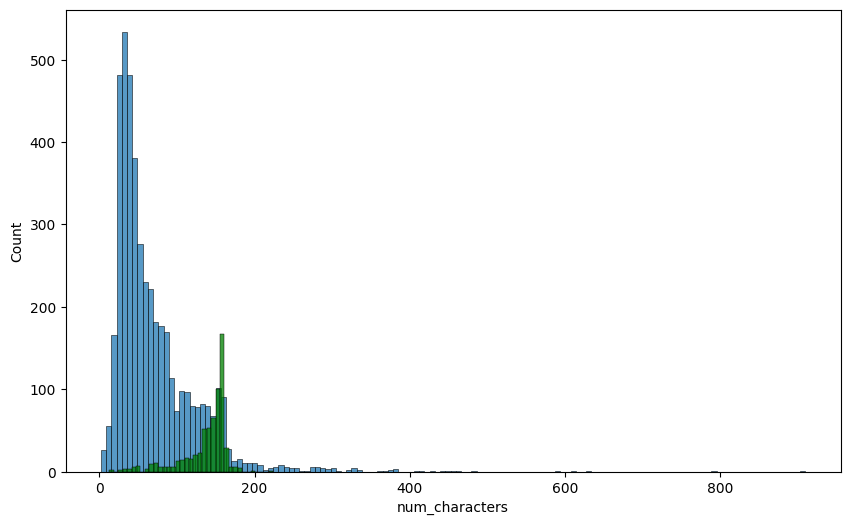

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Type']== 0]['num_characters']) #ham
sns.histplot(df[df['Type']== 1]['num_characters'],color='green') #spam

<Axes: xlabel='num_words', ylabel='Count'>

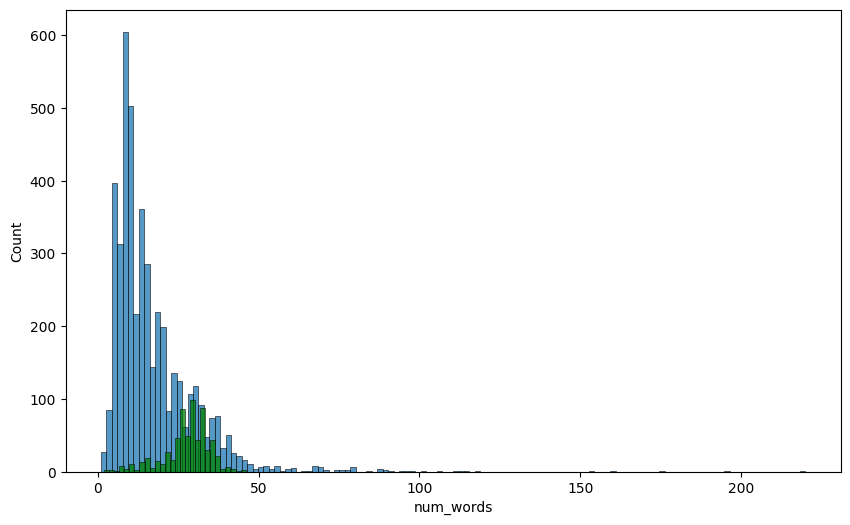

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Type']== 0]['num_words']) #ham
sns.histplot(df[df['Type']== 1]['num_words'],color='green') #spam

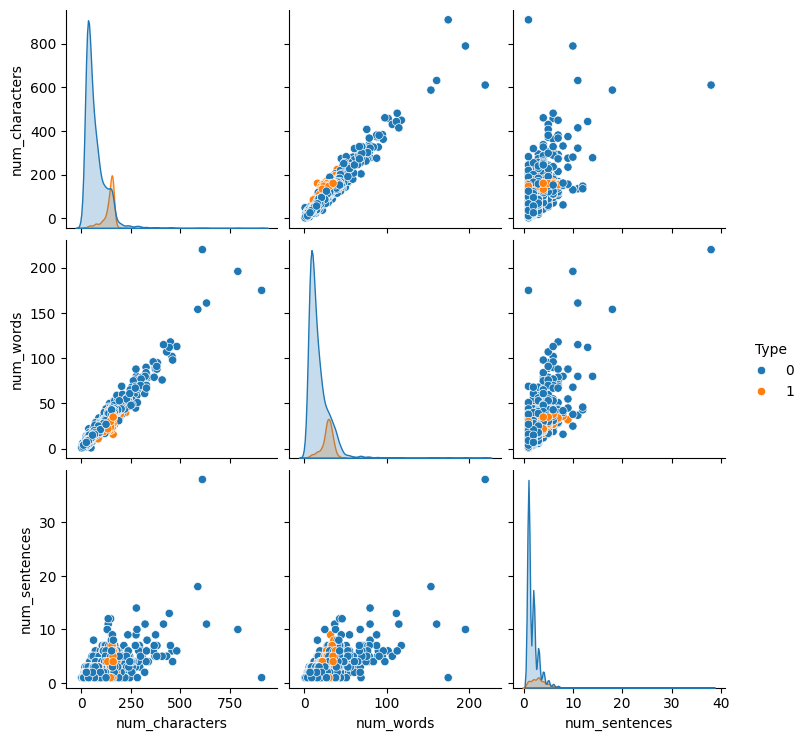

In [36]:
sns.pairplot(df,hue='Type')

<Axes: >

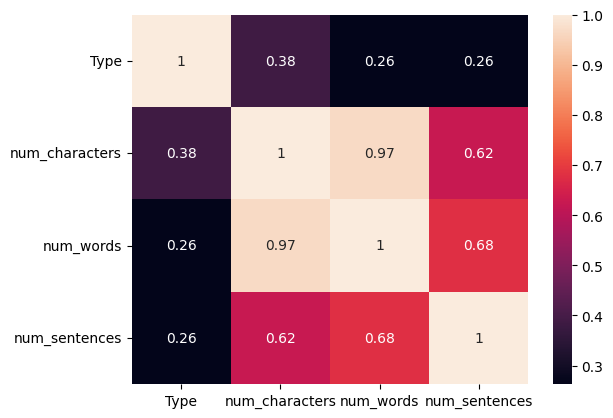

In [37]:
sub_df = df[['Type', 'num_characters', 'num_words', 'num_sentences']]
correlation_matrix=sub_df.corr()
sns.heatmap(correlation_matrix,annot=True)


In [38]:
#Text Prepocessing
 #lower Case
 #Tokenization
 #Removing special characters
 #Removing Stop Words and Punctuation
 #steming

In [39]:
 import nltk
 nltk.download('stopwords')
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords

In [41]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [43]:
transform_text("I loved the YT lectures on Machine Learnig . How About you?")

'love yt lectur machin learnig'

In [44]:
df['transformed_text']=df['Text'].apply(transform_text)

In [45]:
df.drop(columns=['tansformed_text'],inplace=True)

KeyError: "['tansformed_text'] not found in axis"

#world cloud that get focus on important word of the message

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
df.head()

In [ ]:
pip install wordcloud

In [ ]:
spam_wc=wc.generate(df[df['Type']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['Type']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

In [ ]:
spam_corpus=[]
for msg in df[df['Type']==1]['transformed_text'].tolist():
   for word in msg.split():
       spam_corpus.append(word)


In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
# sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30)),y=pd.DataFrame(Counter(spam_corpus).most_common(30)))
# plt.xticks(rotataion='vetical')
# plt.show()
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [ ]:
ham_corpus=[]
for msg in df[df['Type']==0]['transformed_text'].tolist():
   for word in msg.split():
       ham_corpus.append(word)

In [ ]:
len(ham_corpus)

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000-1)

In [ ]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)


In [ ]:
# appending the num_character col to x
# x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [ ]:
x.shape


In [ ]:
y=df['Type'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# tfidf --> mnb because of more precision

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))